<a href="https://colab.research.google.com/github/russmendez/DS_notebooks/blob/master/NJ_Transit_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

https://www.kaggle.com/pranavbadami/nj-transit-amtrak-nec-performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!unzip '/content/drive/My Drive/archive (7).zip' -d '/content/drive/My Drive'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt

In [ ]:
df_2018 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2018_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_05.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_06.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_07.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_08.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_09.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_10.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_11.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2018_12.csv')], 
                    ignore_index=True)

df_2019 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2019_01.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_02.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_03.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_05.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_06.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_07.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_08.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_09.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_10.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_11.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2019_12.csv')], 
                    ignore_index=True)


df_2020 = pd.concat([pd.read_csv('drive/My Drive/NJ Transit Project/2020_01.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_02.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_03.csv'),
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_03.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_04.csv'), 
                     pd.read_csv('drive/My Drive/NJ Transit Project/2020_05.csv')],
                    ignore_index=True)

df_full = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

invalid_trains = pd.read_csv('drive/My Drive/NJ Transit Project/invalid_trains.csv')

invalid_trains_05_01_19__05_18_20 = pd.read_csv('drive/My Drive/NJ Transit Project/invalid_trains_05-01-19_05-18-20.csv')

#EDA

###Looking at the data

In [ ]:
df_full.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit


In [ ]:
df_full.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,6.176036e+06,6.806169e+06,6.806169e+06,6.176036e+06
mean,8.080183e+00,4.214247e+03,4.225329e+03,4.141064e+00
std,5.085804e+00,1.177913e+04,1.179145e+04,6.977320e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,5.800000e+01,5.800000e+01,1.033333e+00
50%,7.000000e+00,1.050000e+02,1.050000e+02,2.283333e+00
75%,1.200000e+01,1.360000e+02,1.360000e+02,5.050000e+00
max,2.600000e+01,4.359900e+04,4.359900e+04,5.730000e+02


In [ ]:
df_full[(df_full.train_id == '3805') & (df_full.date == '2018-03-01')]

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit
5,2018-03-01,3805,6.0,North Elizabeth,109.0,Elizabeth,41.0,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016667,departed,Northeast Corrdr,NJ Transit
6,2018-03-01,3805,7.0,Elizabeth,41.0,Linden,70.0,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083333,departed,Northeast Corrdr,NJ Transit
7,2018-03-01,3805,8.0,Linden,70.0,Rahway,127.0,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,departed,Northeast Corrdr,NJ Transit
8,2018-03-01,3805,9.0,Rahway,127.0,Metropark,83.0,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,departed,Northeast Corrdr,NJ Transit
9,2018-03-01,3805,10.0,Metropark,83.0,Metuchen,84.0,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166667,departed,Northeast Corrdr,NJ Transit


### Looking at NaN

In [ ]:
# Check data for null values
df_full.isna().sum()/df_full.isna().count()*100

# stop_sequence, scheduled_time, and delay_minutes have the same amount of NaN info.
# While dropping it would mean losing almost 9.29% of the info, if they are all the same columns
# it would mean ONLY losing 9.29% The same is true of from_id and to_id

date              0.000000
train_id          0.000000
stop_sequence     9.285492
from              0.000000
from_id           0.030008
to                0.000000
to_id             0.030008
scheduled_time    9.285492
actual_time       0.000000
delay_minutes     9.285492
status            0.000000
line              0.000000
type              0.000000
dtype: float64

In [ ]:
data_1 = NJT_data['to']
data_2 = NJT_data['to_id']

df_list = [data_1, data_2]

intersected = set(list(data_1.index)) 

for i in range(len(data_list)):
  a = set(list(df_list[i].index))
  intersected = intersected.intersection(a)
print(len(intersected))
print(len(data_1))
print('---------')

In [ ]:
# Checking for overlap of NaN in stop_seqeunce, scheduled_time and delay minutes
data_1 = df_full[df_full['stop_sequence'].isna()]
data_2 = df_full[df_full['scheduled_time'].isna()]
data_3 = df_full[df_full['delay_minutes'].isna()]
data_4 = df_full[df_full['to_id'].isna()]
data_5 = df_full[df_full['from_id'].isna()]

df_list = [data_1, data_2, data_3, data_4, data_5]


intersected = set(list(data_1.index))
# This for loop checks the index of the columns with missing values to see if they are alike.
# From this code it is clear that the NaN's in stop_sequence, scheduled_time and delay_minutes effect the same rows
for i in range(0,3):
  a = set(list(df_list[i].index))
  intersected = intersected.intersection(a)
print(len(intersected))
print(len(data_1))
print('---------')

# In this code I show there are no overlaps for the NaN's to_id and from_id. However, I do show that the indecies 
# for these two columns are offset by 1. This makes sense because if a train is going 'to' a station with no id
# then in the next trip is must be coming 'from' a station with no id.
intersected = set(list(data_4.index))
for i in range(4,5):
  a = set(list(df_list[i].index))
  intersected = intersected.intersection(a)
print(len(intersected))

intersected = set(list(data_4.index+1))
for i in range(4,5):
  a = set(list(df_list[i].index))
  intersected = intersected.intersection(a)
print(len(intersected))
print(len(data_4))
print('--------')

# Finally, I show that all the rows with a missing to_id are contained in rows that have a missing stop_sequence and this must be true for the 
# other two columns with a large amount of NaNs. However, there are only 22 missing from_id that corrospond to the other missing data. 
print(len(set(list(data_1.index)).intersection(set(list(data_5.index)))))
print(len(set(list(data_1.index)).intersection(set(list(data_4.index)))))

# If the NaNs are dropped it would result in a loss of 9.29% of the data.

632176
632176
---------
0
2043
2043
--------
22
2043


###Looking at invalid trains

In [ ]:
invalid_trains

,date,train_id,reason
0,2018_03_01,3293,empty file
1,2018_03_01,3297,empty file
2,2018_03_01,4398,empty file
3,2018_03_01,A639,empty file
4,2018_03_02,A2110,no departures
...,...,...,...
7310,2019_04_30,4133,no departures
7311,2019_04_30,4167,no departures
7312,2019_04_30,4151,no departures
7313,2019_04_30,3710,no departures


In [ ]:
invalid_trains_05_01_19__05_18_20

,date,train_id,reason
0,2019_05_01,3293,empty file
1,2019_05_01,4165,no departures
2,2019_05_01,4153,no departures
3,2019_05_01,2406,no departures
4,2019_05_01,4107,no departures
...,...,...,...
18063,2020_05_18,4235,no departures
18064,2020_05_18,4203,no departures
18065,2020_05_18,4257,no departures
18066,2020_05_18,4261,no departures


In [ ]:
# It appears the two invalid trains list are sequential and can be concated.

dates_1 = set(list(invalid_trains['date']))
dates_2 = set(list(invalid_trains_05_01_19__05_18_20['date']))

x = dates_1.intersection(dates_2)
print(x)

# This code confirms that there are no overlapping dates in the two sets of data 

set()


In [ ]:
invalid_df = pd.concat([invalid_trains, invalid_trains_05_01_19__05_18_20], ignore_index=True)

In [ ]:
invalid_df

,date,train_id,reason
0,2018_03_01,3293,empty file
1,2018_03_01,3297,empty file
2,2018_03_01,4398,empty file
3,2018_03_01,A639,empty file
4,2018_03_02,A2110,no departures
...,...,...,...
25378,2020_05_18,4235,no departures
25379,2020_05_18,4203,no departures
25380,2020_05_18,4257,no departures
25381,2020_05_18,4261,no departures


In [ ]:
print(invalid_df.isna().sum()/invalid_df.isna().count()*100)
print(invalid_df.reason.nunique())
print(invalid_df.reason.unique())
# .58% of 'reason' is NaN. This, however, should not pose a problem
# because in the invalid_df.reason column there are two possible states NaN's could be changed to:
# 'empty file' or 'missing state'. I have not found literature explaining these designations
# but it seems to me that the NaN's could be made into 'empty file' without impacting the overall data.

date        0.000000
train_id    0.000000
reason      0.583067
dtype: float64
3
['empty file' 'no departures' 'missing state' nan]


In [ ]:
invalid_df = invalid_df.replace(np.nan, 'empty file')
print(invalid_df.isna().sum()/invalid_df.isna().count()*100)
print(invalid_df.reason.nunique())
print(invalid_df.reason.unique())

date        0.0
train_id    0.0
reason      0.0
dtype: float64
3
['empty file' 'no departures' 'missing state']


### Comparing invalid trains to NaN

In [ ]:
# The formate for the dates differs. In invalid_df its yyyy_mm_dd and in df_full its yyyy-mm-dd
invalid_df.date = invalid_df.date.str.replace('_','-')

In [ ]:
invalid_df

,date,train_id,reason
0,2018-03-01,3293,empty file
1,2018-03-01,3297,empty file
2,2018-03-01,4398,empty file
3,2018-03-01,A639,empty file
4,2018-03-02,A2110,no departures
...,...,...,...
25378,2020-05-18,4235,no departures
25379,2020-05-18,4203,no departures
25380,2020-05-18,4257,no departures
25381,2020-05-18,4261,no departures


In [ ]:
# In order to check id the invalid_df can be used to explain train delays I will compare the two dfs.
# First I will make two dfs. One will contain the train_id and the other the dates.
# With this information I will check to see if there is any overlap.
train_id_1 = set(list(invalid_df['train_id']))
train_id_2 = set(list(df_full['train_id']))
x = train_id_1.intersection(train_id_2)
x = list(x)
train_date_1 = set(list(invalid_df.date))
train_date_2 = set(list(df_full.date))
y = train_date_1.intersection(train_date_2)
y = list(y)

subdf = pd.DataFrame()
for i in (y[0:2]):
  for ii in (x[0:2]):
    sub = df_full[(df_full.date == i) & (df_full.train_id == ii)]
    subdf = subdf.append(sub)

subdf.isna().sum()/subdf.isna().count()*100

# This code only checks the first few rows to see if there is any correlation between the invalid_df and the df_full.
# A complete cross reference is made below, however, it does not seem that the information contained in the invalid_df 
# is also contained in the df_full. That is, there is no connection between the invalid_df and NaNs in the df_full.
# There is no way I will be able to use the invalid_df to explain the NaN's in the df_full. 
# However, the invalid_df may prove useful in explaining time delays. This is something to consider later on.

date              0.0
train_id          0.0
stop_sequence     0.0
from              0.0
from_id           0.0
to                0.0
to_id             0.0
scheduled_time    0.0
actual_time       0.0
delay_minutes     0.0
status            0.0
line              0.0
type              0.0
dtype: float64

In [ ]:
subdf = pd.DataFrame()
for i in (y):
  for ii in (x):
    sub = df_full[(df_full.date == i) & (df_full.train_id == ii)]
    subdf = subdf.append(sub)

subdf.isna().sum()/subdf.isna().count()*100

### delay_minutes visualizations and data cleaning

In [ ]:
# First, I will remove the NaN.
df = df_full.dropna()
df.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,6.174015e+06,6.174015e+06,6.174015e+06,6.174015e+06
mean,8.079646e+00,4.404784e+03,4.404726e+03,4.139964e+00
std,5.084898e+00,1.201058e+04,1.200943e+04,6.976708e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,5.800000e+01,5.900000e+01,1.033333e+00
50%,7.000000e+00,1.040000e+02,1.040000e+02,2.283333e+00
75%,1.200000e+01,1.360000e+02,1.360000e+02,5.050000e+00
max,2.600000e+01,4.359900e+04,4.359900e+04,5.730000e+02


In [ ]:
df.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174015 entries, 0 to 6808211
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   train_id        object 
 2   stop_sequence   float64
 3   from            object 
 4   from_id         float64
 5   to              object 
 6   to_id           float64
 7   scheduled_time  object 
 8   actual_time     object 
 9   delay_minutes   float64
 10  status          object 
 11  line            object 
 12  type            object 
dtypes: float64(4), object(9)
memory usage: 659.5+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


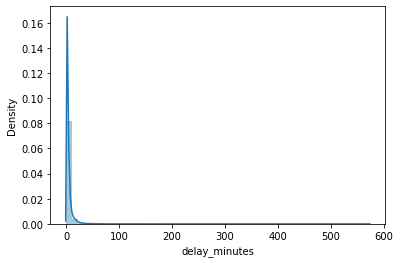

In [ ]:
# A distplot of the delay_minutes for the entire time.
sns.distplot(df['delay_minutes'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 50.0)

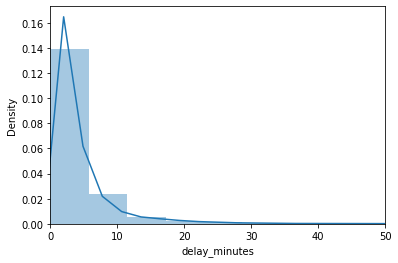

In [ ]:
sns.distplot(df['delay_minutes'], bins=100)
plt.xlim([0,50])

(0.0, 125000.0)

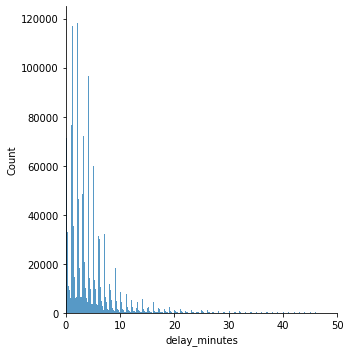

In [ ]:
sns.displot(df['delay_minutes'])
plt.xlim(0,50)
plt.ylim(0,125000)
# As seen in these charts, the majority od delays are only a few minutes. 

### status visualization 

In [ ]:
df.status.unique()

array(['departed', 'estimated', 'cancelled'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


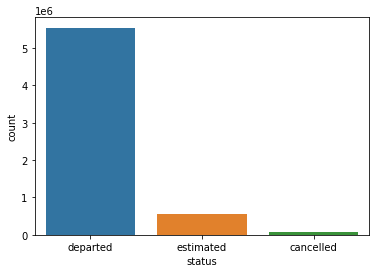

In [ ]:
sns.countplot(df.status)

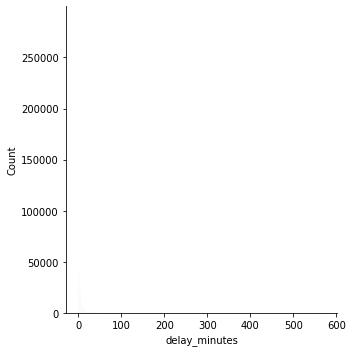

In [ ]:
x = df[df.status == 'estimated']
sns.displot(x.delay_minutes)

### Where is delay_minutes longest?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


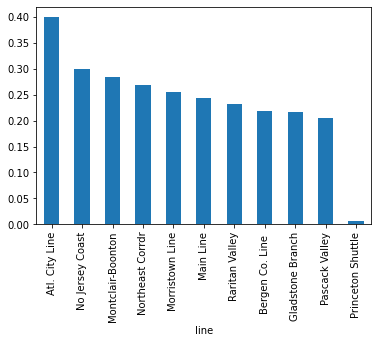

In [ ]:
df['long_delay'] = df['delay_minutes'] > 5
df.groupby('line')['long_delay'].mean().sort_values(ascending=False).plot(kind='bar')

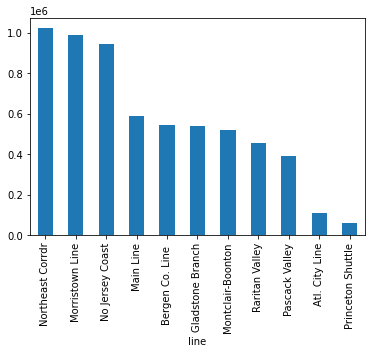

In [ ]:
df.groupby('line')['long_delay'].count().sort_values(ascending=False).plot(kind='bar')

In [ ]:
df.groupby('line')['long_delay'].count()

line
Atl. City Line        108592
Bergen Co. Line       546524
Gladstone Branch      542027
Main Line             589950
Montclair-Boonton     522271
Morristown Line       988398
No Jersey Coast       943643
Northeast Corrdr     1023679
Pascack Valley        391387
Princeton Shuttle      59782
Raritan Valley        457762
Name: long_delay, dtype: int64

In [ ]:
df[df.line == 'Northeast Corrdr'].count()


date              1023679
train_id          1023679
stop_sequence     1023679
from              1023679
from_id           1023679
to                1023679
to_id             1023679
scheduled_time    1023679
actual_time       1023679
delay_minutes     1023679
status            1023679
line              1023679
type              1023679
long_delay        1023679
dtype: int64

### Cancelation 

In [ ]:
x = df.groupby(['line', 'status']).size().unstack()
x['cancelled']/(x['departed']+x['estimated'])

line
Atl. City Line       0.010920
Bergen Co. Line      0.008392
Gladstone Branch     0.019231
Main Line            0.006861
Montclair-Boonton    0.015183
Morristown Line      0.018544
No Jersey Coast      0.016288
Northeast Corrdr     0.013938
Pascack Valley       0.010094
Princeton Shuttle    0.003778
Raritan Valley       0.009035
dtype: float64

### Do the delays increase further down the line?

Text(0, 0.5, 'average delay_minutes')

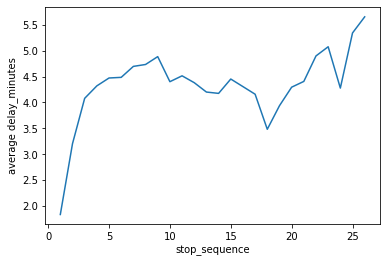

In [ ]:
ax = df.groupby('stop_sequence')["delay_minutes"].mean().plot()
ax.set_ylabel("average delay_minutes")

In [ ]:
df.groupby('from')['delay_minutes'].mean().sort_values(ascending=False).head(10)

from
Cherry Hill                    14.103673
Lindenwold                     13.980036
Egg Harbor City                13.895344
Pennsauken                     13.518110
Atco                           13.390628
Absecon                        12.792125
Hammonton                      12.463913
Atlantic City Rail Terminal    12.207931
Philadelphia                    8.491615
Harriman                        6.566685
Name: delay_minutes, dtype: float64

In [ ]:
df.groupby('to')['delay_minutes'].mean().sort_values(ascending=False).head(10)

to
Lindenwold                     13.594380
Hammonton                      13.358969
Cherry Hill                    13.210115
Pennsauken                     12.968629
Atco                           12.891778
Egg Harbor City                12.799474
Philadelphia                   12.516867
Absecon                        12.317273
Atlantic City Rail Terminal    11.197467
Salisbury Mills-Cornwall        5.786191
Name: delay_minutes, dtype: float64

###When do the delays occur?

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


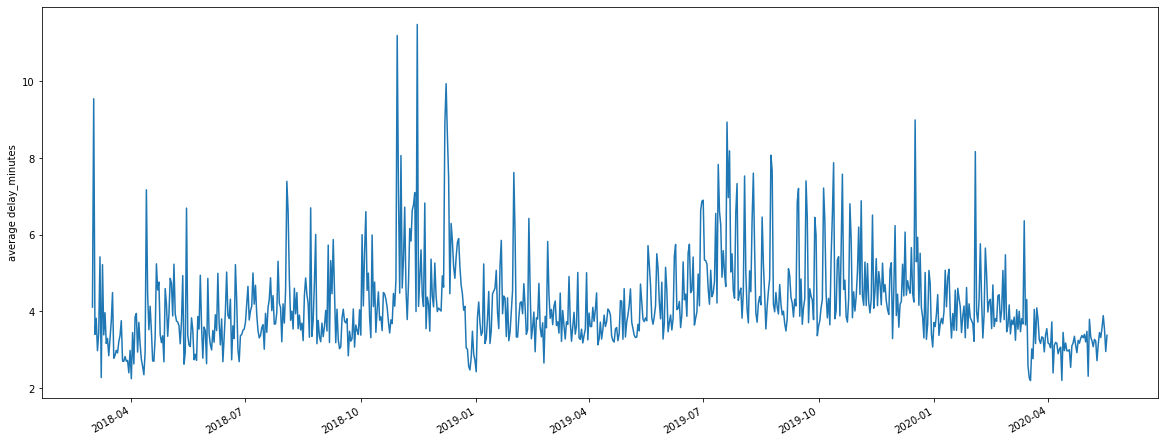

In [ ]:
df.date = pd.to_datetime(df.date)
x = df.groupby('date')['delay_minutes'].mean()
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
fig.autofmt_xdate()
ax.plot(x)
ax.set_ylabel('average delay_minutes')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


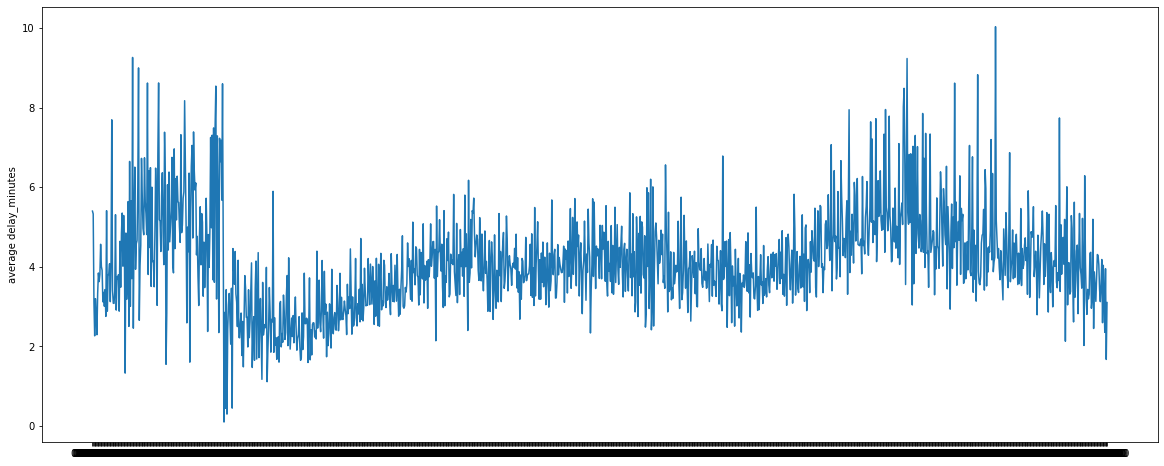

In [ ]:
df.scheduled_time = pd.to_datetime(df.scheduled_time)
df['time'] = df.scheduled_time.dt.time.astype(str)

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
x = df.groupby('time')['delay_minutes'].mean()
ax.plot(x)
ax.set_ylabel('average delay_minutes')
plt.show()

# Limit the number of data plotted to make the labels easier to see. 
# Limit number of months/yewars in plot
# Look into ways to relabel

In [ ]:
x.sort_values(ascending=False).head(5)

time
21:29:00    10.035799
00:54:00     9.262274
19:30:00     9.235417
01:02:00     8.998983
21:05:00     8.828205
Name: delay_minutes, dtype: float64

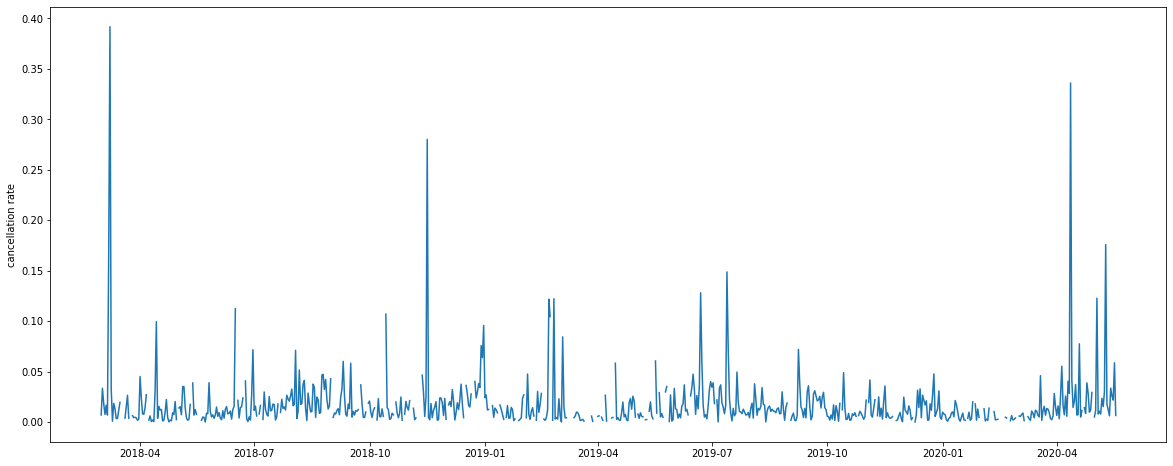

In [ ]:
x = df.groupby(['date', 'status']).size().unstack()
x = (x['cancelled']/(x['departed']+x['estimated']))

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(x)
ax.set_ylabel('cancellation rate')
plt.show()

# Data Cleaning and Feature Engineering

Building models for all 6.1 million would be impractical due to time and processing limitations. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import time

In [ ]:
t1 = time.time()

df['long_delay'] = df['delay_minutes'] > 5
#df = df.drop(columns='type')
df_sample = df.sample(200000)

X = df_sample.iloc[:,:-2]
y = df_sample.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=10)

t2 = time.time()

total = t2-t1
total

0.9530923366546631

In [ ]:
X_test.shape[0]

60000

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

  # prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
